# Pymaceuticals Inc.
---

### Analysis

- The objective of this notebook is to exam data from a study ran on mice with tumors treated with a variety of drug regimens and create visualizations of the results to easily draw conclusions of drug regimen success. Some data cleaning and statistical functions were required to filter and create information that was helpful for our conclusions.
- One important conclusion drawn from the data is that Capomulin and Ramicane are the two most success drugs in this treatment study. We can see this from the bar chart showing amount of timepoints per drug regimen. More timepoints means mice lasted longer, mice that lasted the longest through the study were treated with those two drugs.
- Another evident conclusion is that there is a strong positive correlation between mouse weight and tumor volume. You can visualize this really well in the final scatter plot in this notebook that includes a regression line. As mouse weight increases, tumor volume consistently increases as well. 
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame

pyma_df = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
pyma_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
##Running the .info method just to get an idea of the data

pyma_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Timepoint           1893 non-null   int64  
 2   Tumor Volume (mm3)  1893 non-null   float64
 3   Metastatic Sites    1893 non-null   int64  
 4   Drug Regimen        1893 non-null   object 
 5   Sex                 1893 non-null   object 
 6   Age_months          1893 non-null   int64  
 7   Weight (g)          1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 118.4+ KB


In [3]:
# Checking the number of mice.
pyma_df['Mouse ID'].nunique()

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

##Locating a mask based on duplicates of Mouse ID and Timepoint

mask = pyma_df.duplicated(subset=['Mouse ID', 'Timepoint'])
pyma_df.loc[mask]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Optional: Get all the data for the duplicate mouse ID.

##I can see above the mouse with duplicates is g989. But the mask above only showed the duplicated info 
##So I will locate a mask filtering just that ID to get all the data

mask = pyma_df['Mouse ID'] == 'g989'
pyma_df.loc[mask]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

##Creating a mask for mice who do NOT have ID g989 for the new DataFrame
##I'm going to add cln to the end of the new DataFrame to help make sure I'm using the CLEAN DataFrame

mask = pyma_df['Mouse ID'] != 'g989'
pyma_df_cln = pyma_df.loc[mask].reset_index(drop=True)
pyma_df_cln.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
# Checking the number of mice in the clean DataFrame.
pyma_df_cln['Mouse ID'].nunique()

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.

mean_volume = pyma_df_cln.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
mid_volume = pyma_df_cln.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
var_volume = pyma_df_cln.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
std_volume = pyma_df_cln.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem_volume = pyma_df_cln.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

In [9]:
##Creating a summary leaderboard using the same method in homework 4

drug_summary = pd.DataFrame({
    "Mean Tumor Volume" : mean_volume,
    "Median Tumor Volume" : mid_volume, 
    "Tumor Volume Variance" : var_volume, 
    "Tumor Volume Std. Dev." : std_volume, 
    "Tumor Volume Std. Err." : sem_volume,
})

drug_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
pyma_df_cln.groupby('Drug Regimen').agg({'Tumor Volume (mm3)' : ['mean', 'median', 'var',  'std', 'sem']})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<Axes: title={'center': 'Timepoints by Drug Regimen'}, xlabel='Drug Regimen', ylabel='Number of Observed Mouse Timepoints'>

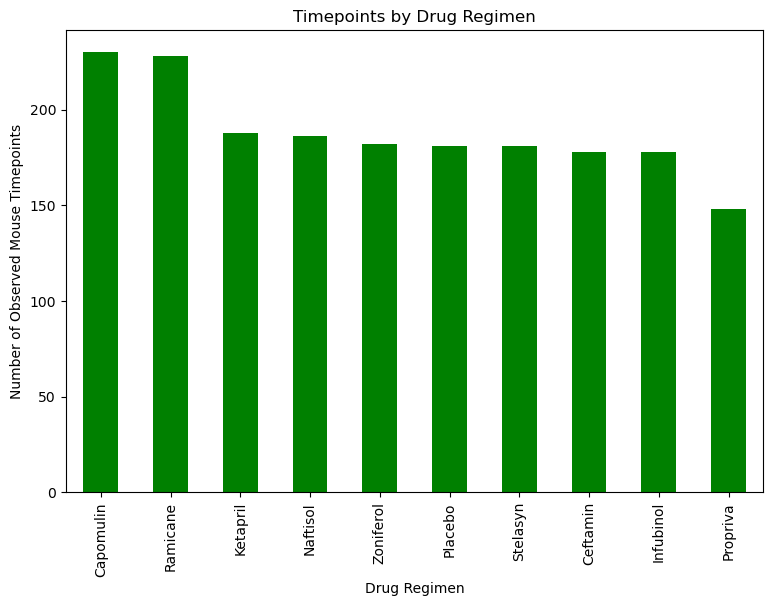

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

##note we are grouping by drug and counting the rows each drug appears in 
##so I can just make a chart with the size count of each drug
## The first time I tried my plot was in a different order than the example so I'll try to sort values

pyma_df_cln.groupby('Drug Regimen').size().sort_values(ascending = False).plot(kind = 'bar', figsize=(9, 6), title = 'Timepoints by Drug Regimen', xlabel = 'Drug Regimen', ylabel = 'Number of Observed Mouse Timepoints', color = 'green')

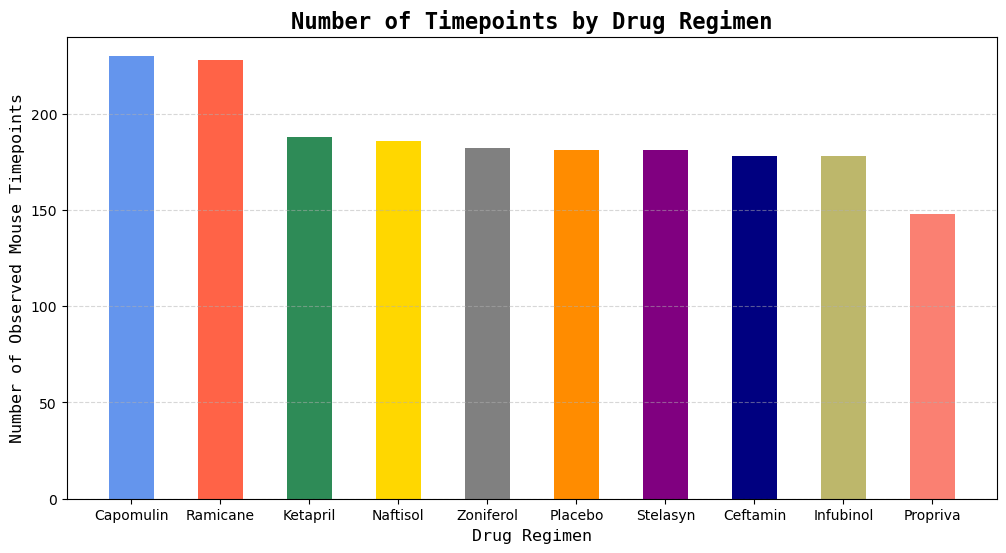

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

bar_data = pyma_df_cln.groupby('Drug Regimen').size().sort_values(ascending = False)

plt.figure(figsize=(12, 6))

plt.bar(bar_data.index, bar_data.values, width = 0.5, color = ('cornflowerblue', 'tomato', 'seagreen', 'gold', 'grey', 'darkorange', 'purple', 'navy', 'darkkhaki', 'salmon'), align="center")

plt.xlabel("Drug Regimen", fontfamily="Monospace", fontsize = 12)
plt.ylabel("Number of Observed Mouse Timepoints", fontfamily="Monospace", fontsize = 12)
plt.title("Number of Timepoints by Drug Regimen", fontfamily="Monospace", fontweight="bold", fontsize=16)

plt.ylim(0, 240)

plt.grid(axis="y", linestyle="--", alpha=0.5)

plt.show()

In [13]:
##finding and collecting all female mice with a unique Mouse ID. this will give me a numerical value for how many female mice I have.
##this numerical value should match the % in the example

mask = pyma_df_cln['Sex'] == 'Female'
female_count = pyma_df_cln['Mouse ID'].loc[mask].nunique()
female_count

123

In [14]:
##same as above with male mice

mask = pyma_df_cln['Sex'] == 'Male'
male_count = pyma_df_cln['Mouse ID'].loc[mask].nunique()
male_count

125

<Axes: >

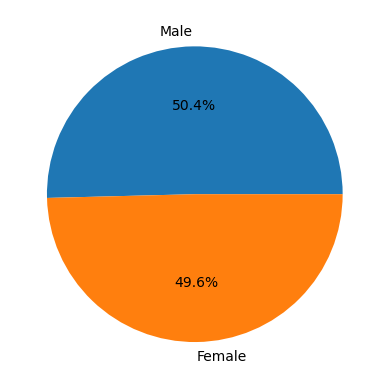

In [15]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
pie_data = pd.Series({'Male' : male_count, 'Female' : female_count})

# Make the pie chart

pie_data.plot(kind = 'pie', autopct='%1.1f%%')

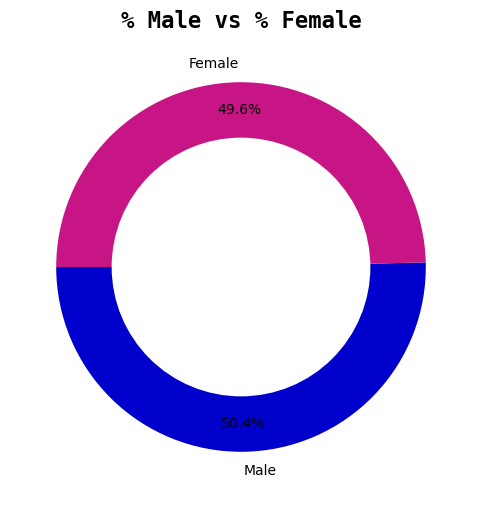

In [16]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

##I find donut charts much easier to read 

# Get the unique mice with their gender

donut_data = pd.Series({'Male' : male_count, 'Female' : female_count})

plt.figure(figsize=(6, 6))
    
plt.pie(donut_data.values, labels=donut_data.index, autopct="%1.1f%%", shadow=False, startangle=180, pctdistance=0.85, colors= ('mediumblue', 'mediumvioletred'))
    
centre_circle = plt.Circle((0,0), 0.70, fc='white')  # Adjust 0.70 for hole size
plt.gca().add_artist(centre_circle)
    
plt.title('% Male vs % Female', fontweight="bold", fontsize=16, fontfamily="Monospace")
    
    
plt.show()


## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

##make a list variable for the drug regimens wanted 
regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

##pull just the rows that match the Drug Regimen in my list
mask = pyma_df_cln['Drug Regimen'].isin(regimens)
select_regimens = pyma_df_cln.loc[mask]

# Start by getting the last (greatest) timepoint for each mouse

max_timepoint = select_regimens.groupby('Mouse ID')['Timepoint'].max()
max_timepoint

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

##merging on right(max_timepoint) so I have one row per mouse
pyma_df_maxes = pd.merge(pyma_df_cln, max_timepoint, how="right", on=['Mouse ID', 'Timepoint'])
pyma_df_maxes

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
95,y769,45,68.594745,4,Ceftamin,Female,6,27
96,y793,45,31.896238,2,Capomulin,Male,17,17
97,y865,45,64.729837,3,Ceftamin,Male,23,26
98,z578,45,30.638696,0,Ramicane,Male,11,16


In [18]:
## double checking that Timpoints are accurate and not all '45'. I'm hoping to see mulitple unique Timepoints

pyma_df_maxes['Timepoint'].nunique()

10

In [19]:
# Put treatments into a list for for loop (and later for plot labels)
## I need to make a variable that contains a list of the unique drug regimens
drug_treatments = pyma_df_maxes['Drug Regimen'].unique()

# Create empty list to fill with tumor vol data (for plotting)

tumor_vol_data = [] 

# Calculate the IQR and quantitatively determine if there are any potential outliers.
##Looping through the treatments in drug_treatments I believe
for treatment in drug_treatments:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    ##could use .loc method to locate where the Drug Regimen column matches the treatments in drug_treatments and grab the Tumor Volume (mm3) value
    treatment_vol_data = pyma_df_maxes.loc[pyma_df_maxes['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']

    # add subset
    ##append like we have been in class activities loops
    tumor_vol_data.append(treatment_vol_data)

    # Determine outliers using upper and lower bounds
    ##I'm going to try the layout in class activity on quartiles 

    quartiles = treatment_vol_data.quantile([.25,.75])
    q1 = quartiles[0.25]
    q2 = quartiles[0.75]
    iqr = q2-q1
    upper_bound = q2 + (1.5*iqr)
    lower_bound = q1 - (1.5*iqr)

    ##setting parameter for potential outliers 
    outliers = treatment_vol_data[(treatment_vol_data < lower_bound) | (treatment_vol_data > upper_bound)]

    print(f"{treatment}'s potential Tumor Volume outliers: {outliers.tolist()}")
    

Infubinol's potential Tumor Volume outliers: [36.3213458]
Ceftamin's potential Tumor Volume outliers: []
Ramicane's potential Tumor Volume outliers: []
Capomulin's potential Tumor Volume outliers: []


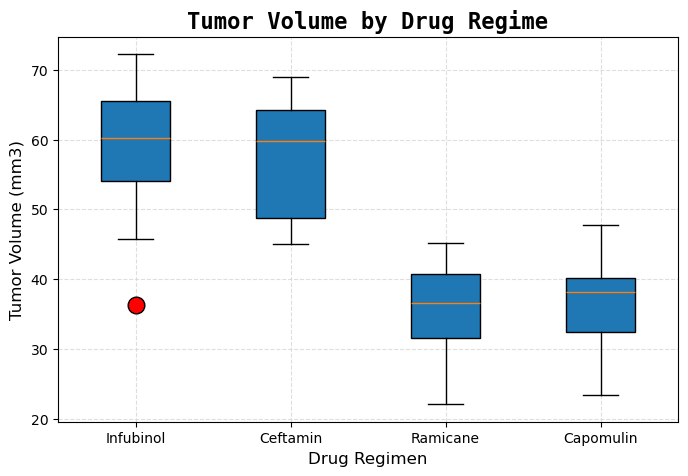

In [20]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.

plt.figure(figsize=(8, 5))

plt.boxplot(tumor_vol_data, tick_labels = drug_treatments, patch_artist=True, flierprops=dict(marker='o', markerfacecolor='red', markersize=12))



plt.ylabel("Tumor Volume (mm3)", fontsize=12)
plt.xlabel('Drug Regimen', fontsize=12)
plt.title('Tumor Volume by Drug Regime', fontweight="bold", fontsize=16, fontfamily='Monospace')


plt.grid(linestyle="--", color="lightgrey", alpha=0.75)


plt.show()

## Line and Scatter Plots

In [21]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

##First I'm going to make a DataFrame that only has information for the 'Capulin' Drug Regimen

mask = pyma_df_cln['Drug Regimen'] == 'Capomulin'
pyma_cap = pyma_df_cln.loc[mask]
pyma_cap

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
224,j246,0,45.000000,0,Capomulin,Female,21,21
225,r554,0,45.000000,0,Capomulin,Female,8,17
226,s185,0,45.000000,0,Capomulin,Female,3,17
227,b742,0,45.000000,0,Capomulin,Male,7,21
...,...,...,...,...,...,...,...,...
1841,s710,45,40.728578,1,Capomulin,Female,1,23
1846,j119,45,38.125164,1,Capomulin,Female,7,23
1865,i557,45,47.685963,1,Capomulin,Female,1,24
1875,r944,45,41.581521,2,Capomulin,Male,12,25


In [28]:
## from the groupby summary above I can see all mice treated with Capomulin, I'll just select the first one "b128", for ease 
mask = pyma_cap['Mouse ID'] == 'b128'
b128_data = pyma_cap.loc[mask]


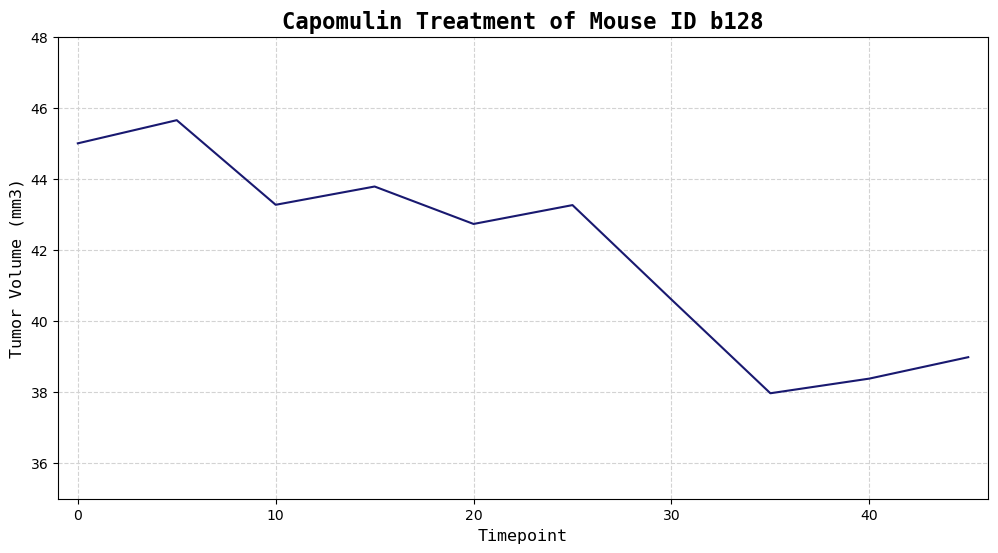

In [29]:
##Creating the Line Plot for a sinlge mouse treated with Capomulin

plt.figure(figsize=(12, 6))

plt.plot(b128_data.Timepoint, b128_data['Tumor Volume (mm3)'], color = 'midnightblue')

plt.xlabel("Timepoint", fontfamily="Monospace", fontsize=12)
plt.ylabel("Tumor Volume (mm3)", fontfamily="Monospace", fontsize=12)
plt.title("Capomulin Treatment of Mouse ID b128", fontweight="bold", fontsize=16, fontfamily="Monospace")
plt.grid(linestyle="--", color="lightgrey", alpha=1)
plt.xlim(-1, 46)
plt.ylim(35, 48)
plt.show()


In [24]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

##First I need to pull the info I need. Individual mouse weight and average tumor volume for each mouse since weight is consistent across the entire data
##Grouping by Mouse ID will ensure I don't have duplicate mice and unneeded additional points in the plot
##I can aggregate by the average tumor volume and really use any method for wieght since it doesn't change
weight_vs_volume = pyma_cap.groupby('Mouse ID').agg({'Tumor Volume (mm3)': 'mean', 'Weight (g)': 'max'})
weight_vs_volume.head()

,Tumor Volume (mm3),Weight (g)
Mouse ID,,
b128,41.963636,22
b742,40.083699,21
f966,36.505973,17
g288,41.990097,19
g316,44.613344,22


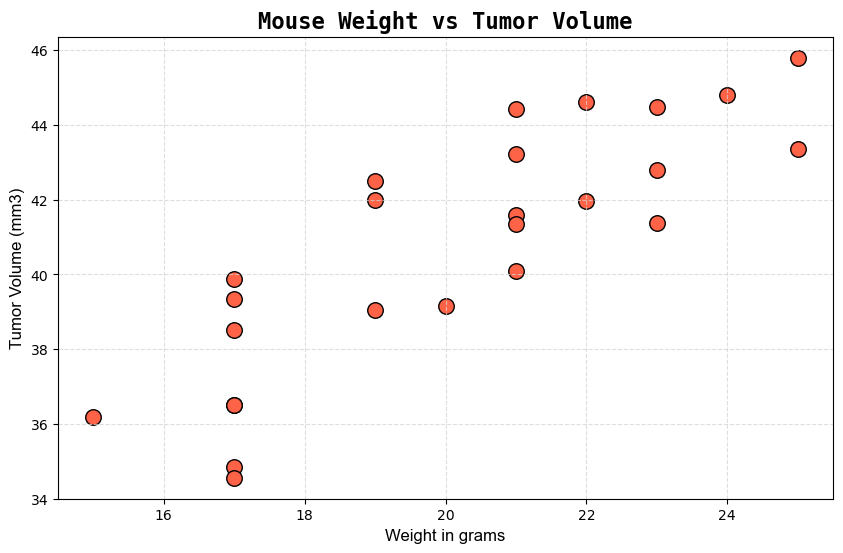

In [25]:
##Now I can make the plot using the data from the concise DataFrame I made

plt.figure(figsize=(10, 6))

plt.scatter(weight_vs_volume['Weight (g)'], weight_vs_volume['Tumor Volume (mm3)'], color="tomato", edgecolor="black", s=125)


plt.xlabel("Weight in grams", fontfamily="Arial", fontsize=12)
plt.ylabel("Tumor Volume (mm3)", fontfamily="Arial", fontsize=12)
plt.title("Mouse Weight vs Tumor Volume", fontweight="bold", fontsize=16, fontfamily="Monospace")

##Adding background grid for readability
plt.grid(linestyle="--", color="lightgrey", alpha=0.75)

plt.show()

## Correlation and Regression

In [26]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

##setting up varibales to hold the values to use in regression equation
##I can use the same concise DataFrame to set my values
x_values = weight_vs_volume['Weight (g)']
y_values = weight_vs_volume['Tumor Volume (mm3)']

##finding regression with sci py method .linregress
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

##Now that I have the values set I can run the correlation function easily 
weight = weight_vs_volume['Weight (g)']
avg_volume = weight_vs_volume['Tumor Volume (mm3)']
correlation = weight.corr(avg_volume)
print(f"The correlation between both factors is {round(correlation, 2)}")

##I seperated the printed correlation and the plot for readability 

The correlation between both factors is 0.84


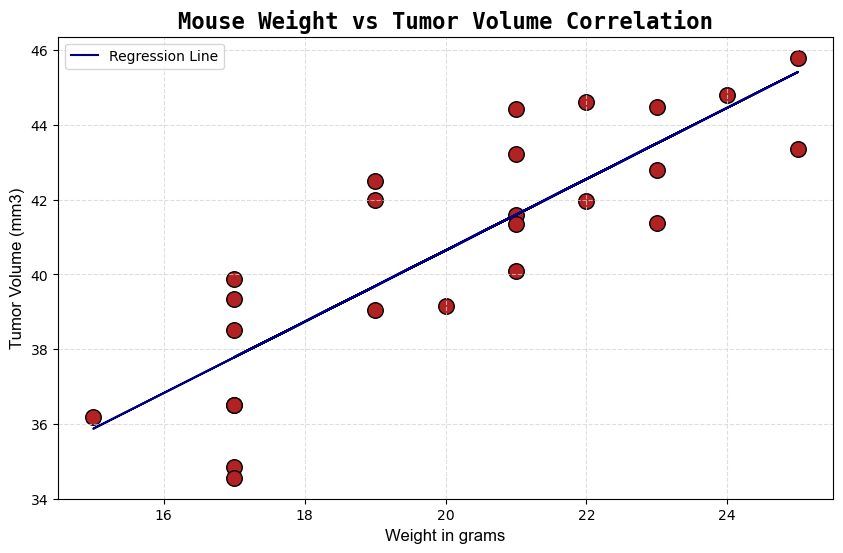

In [27]:
plt.figure(figsize=(10, 6))

##Same scatter plot from above
plt.scatter(weight_vs_volume['Weight (g)'], weight_vs_volume['Tumor Volume (mm3)'], color="firebrick", edgecolor="black", s=125)
##This is where I will add the line
plt.plot(x_values, intercept + slope * x_values, label='Regression Line', color='navy')


plt.xlabel("Weight in grams", fontfamily="Arial", fontsize=12)
plt.ylabel("Tumor Volume (mm3)", fontfamily="Arial", fontsize=12)
plt.title("Mouse Weight vs Tumor Volume Correlation", fontweight="bold", fontsize=16, fontfamily="Monospace")

plt.grid(linestyle="--", color="lightgrey", alpha=0.75)

plt.legend()
plt.show()